In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [67]:
# dataset taken from 
# http://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure
data = pd.read_csv('CASP.csv').head(10001)
data.tail()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
9996,1.981,4965.08,1294.94,0.26080,44.5357,6.993987e+05,57.0290,1888.02,22,43.7068
9997,12.912,12192.60,3619.00,0.29681,115.2970,1.638283e+06,156.9460,4610.52,38,31.5258
9998,1.727,8636.47,2105.00,0.24373,85.1331,1.189599e+06,144.5490,3195.12,11,36.7767
9999,3.398,4932.43,1390.31,0.28187,45.0674,6.302525e+05,74.2844,2148.54,21,42.7945
10000,11.279,4700.37,1123.88,0.23910,46.8147,6.080210e+05,66.5346,1945.21,26,43.0591


In [68]:
data.head()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


In [69]:
y = data[['RMSD']].to_numpy()[:, 0]
y

array([17.284,  6.021,  9.275, ...,  1.727,  3.398, 11.279])

In [70]:
X = data.loc[:, data.columns != 'RMSD']
X.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


In [71]:
# Feature normalization/standardization
X = (X - X.mean()) / X.std()
X.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,0.930243,0.910310,0.262840,1.073420,0.916254,1.025016,0.181847,0.577063,-1.268557
1,-0.917000,-0.955383,-0.625698,-0.910711,-1.013447,-0.839441,-0.376818,-0.539464,0.687505
2,-0.532316,-0.883654,-1.246279,-0.657198,-0.522243,-0.918163,-0.579478,-0.716691,0.732531
3,-0.357130,-0.437109,-0.321340,-0.647280,-0.278944,-0.515937,-0.423826,0.009938,0.775536
4,-0.598805,-0.876239,-1.096025,-0.928532,-0.620822,-0.732933,-0.676547,-0.504019,0.919839


In [72]:
print (X.values.shape)
print (y.shape)

(10001, 9)
(10001,)


In [73]:
def hypothesis(theta, X, features):
    h = np.ones((X.shape[0], 1))
    theta = theta.reshape(1, features + 1)
    for i in range(X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

In [74]:
def gradient_descent(theta, alpha, epochs, h, X, y, features):
    loss = np.ones(epochs)
    for i in range(epochs):
        theta[0] = theta[0] - (alpha / X.shape[0]) * sum(h - y)
        for j in range(1, features + 1):
            theta[j] = theta[j] - (alpha / X.shape[0]) * sum((h - y) * X.transpose()[j])
        h = hypothesis(theta, X, features)
        loss[i] = (1 / (2 * X.shape[0])) * sum(np.square(h - y))
    theta = theta.reshape(1, features + 1)
    return theta, loss

In [75]:
def linear_regression(X, y, alpha, epochs):
    features = X.shape[1]
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
    theta = np.zeros(features + 1)
    h = hypothesis(theta, X, features)
    theta, loss = gradient_descent(theta, alpha, epochs, h, X, y, features)
    return theta, loss

In [76]:
theta, loss = linear_regression(X.values, y, 0.0001, 30000)
print ('Theta : {}\nLoss : {}'.format(theta, loss))

Theta : [[ 7.2950612   0.23777653  1.20772277  1.69806553 -1.73232232  0.27333958
  -0.47133635  0.00764734  0.26982106  0.22375814]]
Loss : [48.08842082 48.081791   48.07516252 ... 14.72386565 14.72382726
 14.72378887]


In [77]:
n_iterations = [x for x in range(30000)]

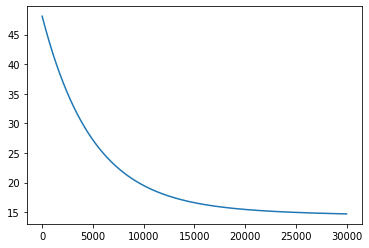

In [78]:
plt.plot(n_iterations, loss)

In [79]:
data_validate = pd.read_csv('CASP.csv').loc[10001:10300]
data_validate.tail()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
10296,14.041,10584.00,3716.70,0.35116,102.9150,1.479554e+06,161.7540,4230.97,67,33.5080
10297,12.711,7948.26,1844.76,0.23209,77.3968,1.073278e+06,105.9030,2952.22,66,39.7481
10298,2.700,9834.58,3665.25,0.37269,106.7430,1.392109e+06,139.5430,3768.89,19,34.4906
10299,15.828,6902.40,1517.22,0.21981,89.4131,9.517994e+05,84.4356,2984.31,27,38.5487
10300,6.973,13048.90,3519.88,0.26974,175.7760,1.750595e+06,225.4620,4973.27,85,27.3280


In [80]:
y = data_validate[['RMSD']].to_numpy()[:, 0]
y

array([14.972, 13.411, 10.252,  3.837, 19.281,  3.   , 14.103, 17.862,
        2.134,  3.287, 17.271, 11.945, 13.107, 11.02 ,  2.356, 19.888,
        1.924,  1.16 ,  3.452,  9.113,  5.431,  2.089,  4.895, 17.515,
        0.821,  2.415,  2.093,  5.863, 15.115,  2.145, 17.663,  8.623,
        3.747, 16.983,  2.022,  1.986,  2.135, 19.574, 18.76 ,  2.95 ,
        1.764, 15.278,  2.357, 11.008,  2.036,  1.285,  4.603,  6.272,
        4.931,  1.347,  1.998,  6.618, 12.271,  7.66 ,  2.434,  0.884,
       11.483, 10.217,  5.025, 10.737, 16.931,  9.893,  1.502, 20.052,
        2.511,  1.141,  1.873,  1.996,  1.035, 13.973,  1.921, 18.225,
        9.868, 10.535,  1.957, 19.132, 14.176, 12.811, 14.508,  3.166,
       19.736,  1.817,  1.672, 20.299, 12.943,  1.983,  3.626,  2.193,
        4.232,  5.369,  2.47 ,  4.985, 14.367, 10.732, 13.743,  3.793,
        9.332,  1.875, 12.184,  2.299,  7.7  ,  2.798, 20.565,  2.113,
        2.964,  7.573,  1.017,  1.833, 13.72 , 15.404,  9.441,  4.502,
      

In [81]:
X_validate = data_validate.loc[:, data.columns != 'RMSD']
X_validate = (X_validate - X_validate.mean()) / X_validate.std()
X_validate['x0'] = np.ones(300)
X_validate.tail()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,x0
10296,0.133248,0.442683,0.827793,-0.064937,0.155476,0.185846,0.167392,-0.034405,-0.111540,1.0
10297,-0.517599,-0.810761,-1.096021,-0.529438,-0.562862,-0.610123,-0.778103,-0.053343,0.916189,1.0
10298,-0.051807,0.408232,1.175653,0.004744,0.000864,-0.130697,-0.174265,-0.943452,0.050291,1.0
10299,-0.775855,-1.030080,-1.294429,-0.310709,-0.777649,-0.916068,-0.754376,-0.791944,0.718651,1.0
10300,0.741909,0.310893,-0.487710,1.261335,0.634704,1.093790,0.716242,0.306488,-1.129371,1.0


In [82]:
columns = X_validate.columns.tolist()
columns.insert(0, columns.pop(columns.index('x0')))
X_validate = X_validate.reindex(columns = columns)
X_validate

,x0,F1,F2,F3,F4,F5,F6,F7,F8,F9
10001,1.0,-0.840129,-1.262243,-1.998713,-0.349338,-0.843691,-0.845786,-0.248034,0.950396,-0.096256
10002,1.0,-0.744529,-0.716368,-0.281709,-0.783751,-0.761010,-0.869850,-1.064668,-1.057083,1.028364
10003,1.0,-0.706801,-0.465892,0.462644,-0.922238,-0.739499,-0.674341,-0.889307,-0.943452,1.115456
10004,1.0,-1.044872,-1.389801,-2.122153,-1.024494,-1.044295,-1.192693,-0.714116,-0.867698,0.899900
10005,1.0,2.354224,3.466144,1.947473,1.611920,2.379280,2.272173,1.252507,1.120842,-1.803890
...,...,...,...,...,...,...,...,...,...,...
10296,1.0,0.133248,0.442683,0.827793,-0.064937,0.155476,0.185846,0.167392,-0.034405,-0.111540
10297,1.0,-0.517599,-0.810761,-1.096021,-0.529438,-0.562862,-0.610123,-0.778103,-0.053343,0.916189
10298,1.0,-0.051807,0.408232,1.175653,0.004744,0.000864,-0.130697,-0.174265,-0.943452,0.050291
10299,1.0,-0.775855,-1.030080,-1.294429,-0.310709,-0.777649,-0.916068,-0.754376,-0.791944,0.718651


In [83]:
thetas = theta[0]
thetas

array([ 7.2950612 ,  0.23777653,  1.20772277,  1.69806553, -1.73232232,
        0.27333958, -0.47133635,  0.00764734,  0.26982106,  0.22375814])

In [84]:
counter = 0
mse = 0
for index, row in X_validate.iterrows():
    predicted = (row.values * thetas)[0]
    mse += (y[index - 10001] - predicted)**2
    counter += 1
    
mse = mse / counter

In [85]:
print ('Mean square error between predicted values of 300 samples:\n{}'.format(mse))

Mean square error between predicted values of 300 samples:
36.214344237749316
